In [ ]:
# Installing and import necessary libraries
!pip install adtk

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import ThresholdAD, QuantileAD, InterQuartileRangeAD, GeneralizedESDTestAD, PersistAD, VolatilityShiftAD, CustomizedDetectorHD

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.7 MB/s eta 0:00:00


In [ ]:
# Load data
s_train = pd.read_csv("temperature.csv", parse_dates=True, squeeze=True)
s_train["Date"] = pd.to_datetime(s_train["Date"])
s_train = s_train.set_index("Date")
s_train = s_train['Mean']

s_train = yf.download("AAPL")['Close']

<ipython-input-3-658d6ad6c835>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s_train = pd.read_csv("temperature.csv", parse_dates=True, squeeze=True)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
s_train = validate_series(s_train)
print(s_train)

Date
1980-12-12      0.128348
1980-12-15      0.121652
1980-12-16      0.112723
1980-12-17      0.115513
1980-12-18      0.118862
                 ...    
2023-12-22    193.600006
2023-12-26    193.050003
2023-12-27    193.149994
2023-12-28    193.580002
2023-12-29    192.529999
Name: Close, Length: 10853, dtype: float64


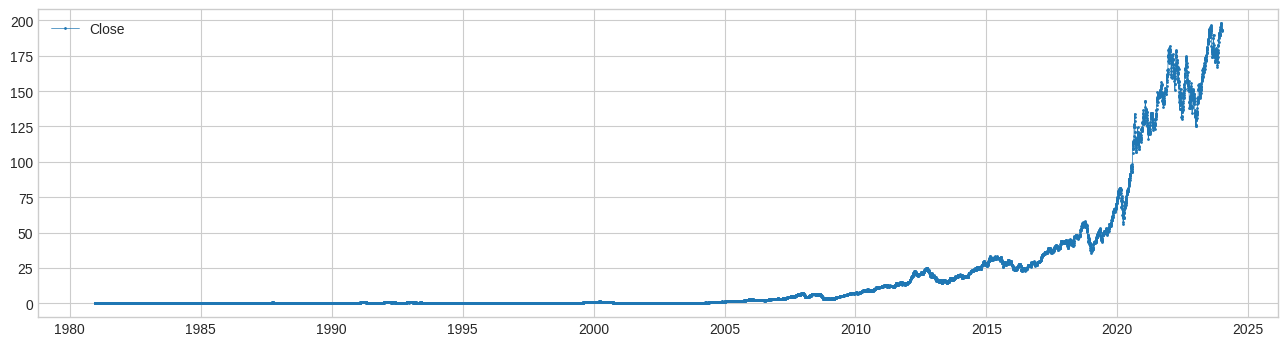

In [ ]:
# Plot temperature or AAPL stock price
plot(s_train)
plt.show()

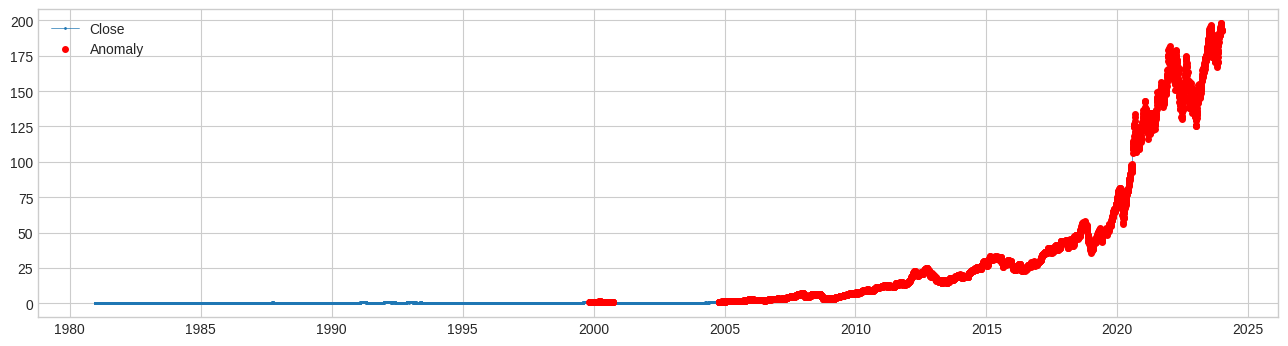

In [ ]:
# Threshold Anomaly Detection (detect anomalies based on thresholds)
threshold_ad = ThresholdAD(high=0.75, low=-0.5)
anomalies = threshold_ad.detect(s_train)
plot(s_train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker")
plt.show()

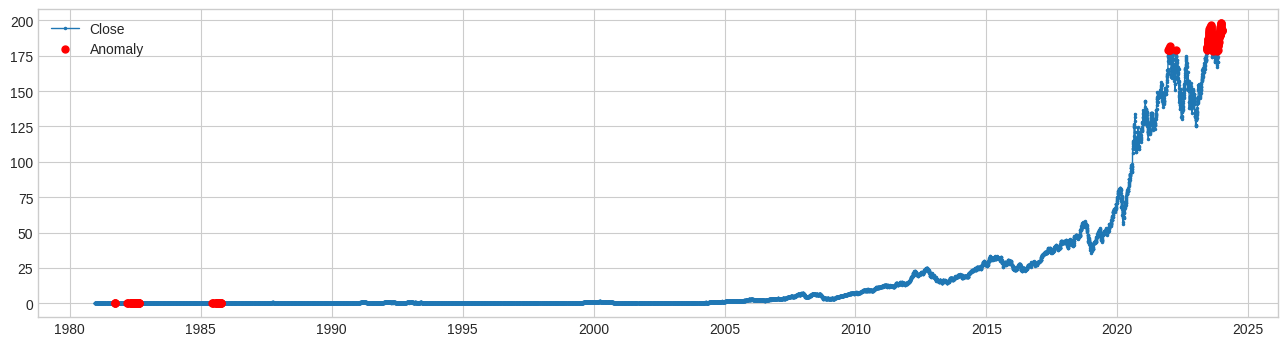

In [ ]:
# Quantile Anomaly Detection (detect anomalies based on percentiles)
quantile_ad = QuantileAD(high=0.99, low=0.01)
anomalies = quantile_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")
plt.show()

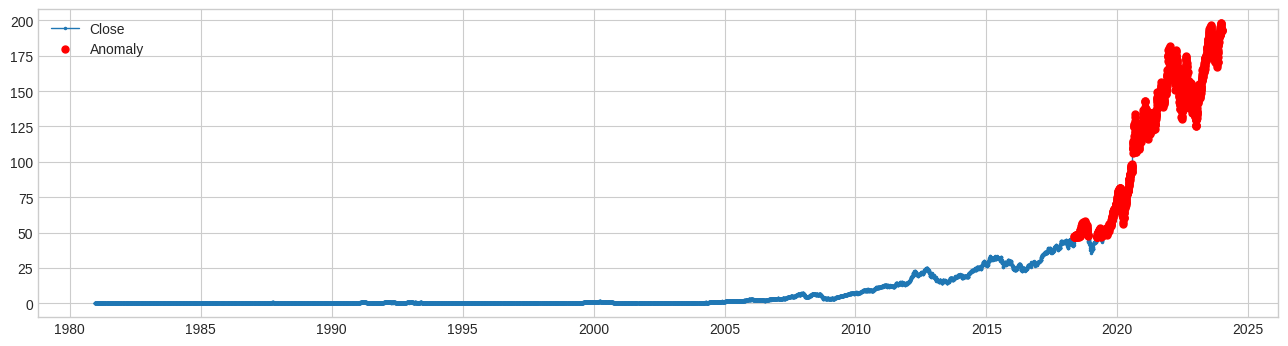

In [ ]:
# Inter Quartile Range Anomaly Detection (detect anomalies based on IQR)
iqr_ad = InterQuartileRangeAD(c=1.5)
anomalies = iqr_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")
plt.show()

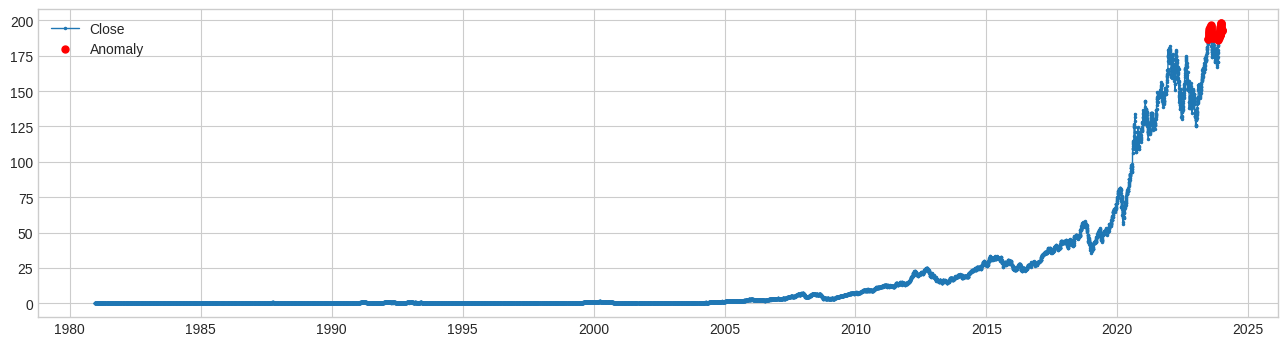

In [ ]:
# Generalized Extreme Studentized Deviate (ESD) Test (detect anomalies assuming normal distribution)
esd_ad = GeneralizedESDTestAD(alpha=0.3)
anomalies = esd_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker")
plt.show()

/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


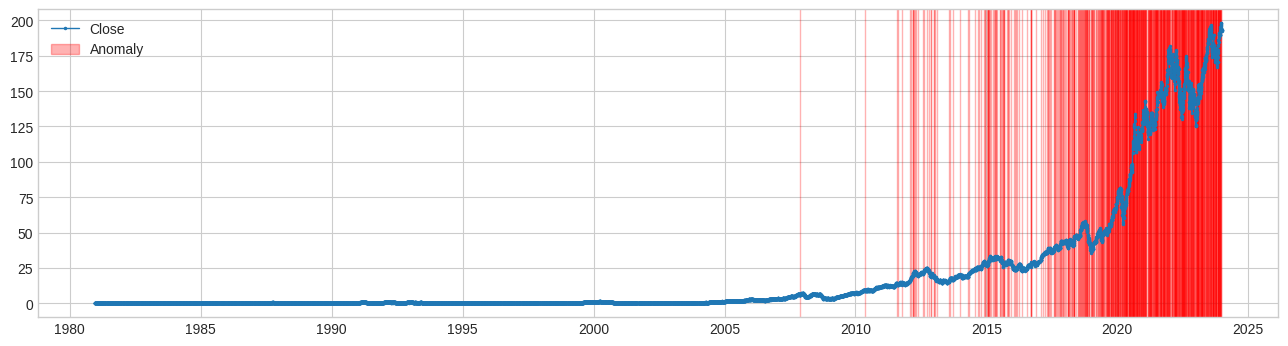

In [ ]:
# Persist Anomaly Detection (detect persistent changes)
persist_ad = PersistAD(c=3.0, side='positive')
anomalies = persist_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red')
plt.show()

/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


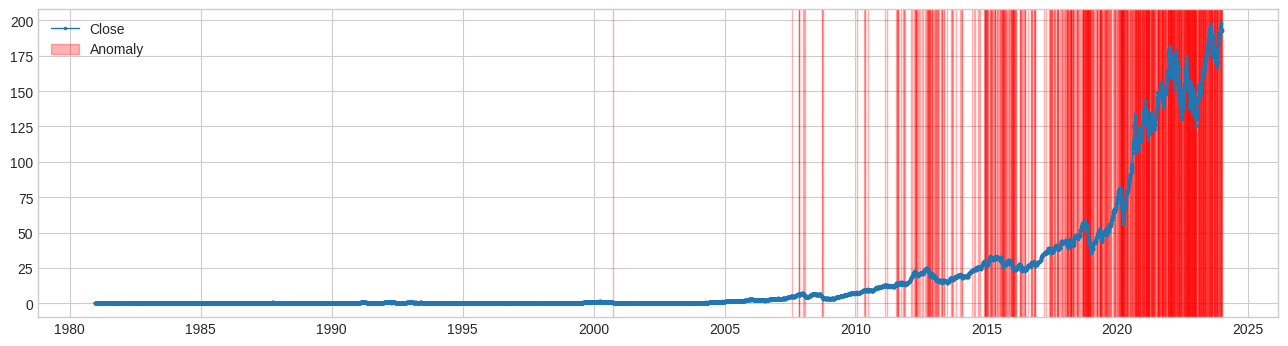

In [ ]:
persist_ad = PersistAD(c=1.5, side='negative')
anomalies = persist_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red')
plt.show()

/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


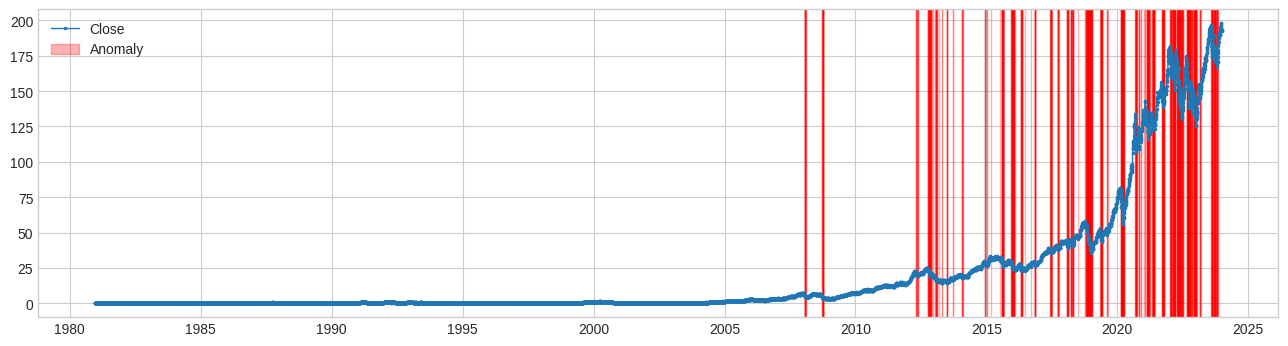

In [ ]:
persist_ad.window = 24  # by default just one day, we can adjust it for mid- to long-term detection
anomalies = persist_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red')
plt.show()

In [ ]:
# Volatility Shift Anomaly Detection (detect volatility shifts)
s_train = yf.download("TSLA")['Close']
s_train = validate_series(s_train)

[*********************100%%**********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


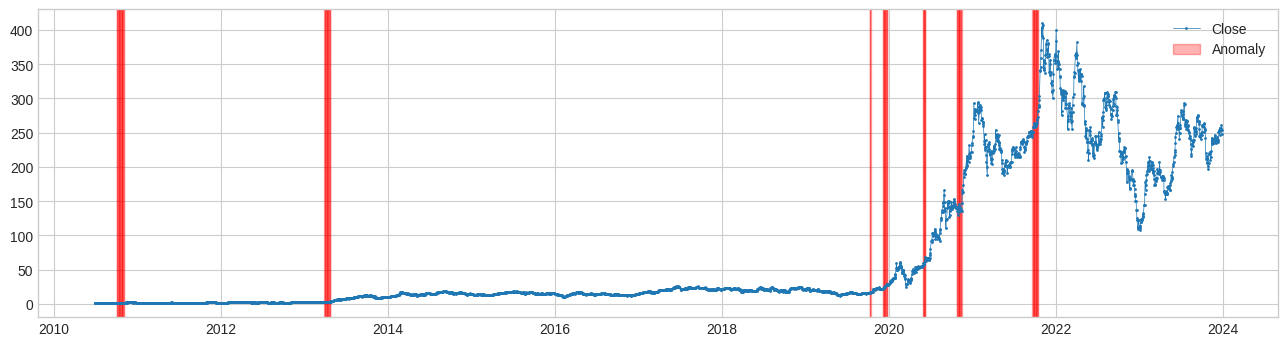

In [ ]:
volatility_shift_ad = VolatilityShiftAD(c=6.0, side='positive', window=30)
anomalies = volatility_shift_ad.fit_detect(s_train)
plot(s_train, anomaly=anomalies, anomaly_color='red')
plt.show()